<a href="https://colab.research.google.com/github/gukouk176-debug/colab2/blob/main/datascience_11_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第11回講義：教師なし学習
+ k-means法によるクラスタリング
+ 主成分分析（PCA）






## 全講義共通初期設定
+ 警告の非表示(実装時は非推奨)
+ numpy pandas小数点以下桁数の表示設定
+ pandas全データ表示設定
+ Google driveへの接続

In [ ]:
# ワーニングを非表示にする
# この設定は不都合が見えなくなる為、お勧めしない
# 今回は教育資料用に、出力を簡素化する為に利用する
import warnings
warnings.simplefilter('ignore')

# モジュールの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 小数点以下桁数の表示設定
np.set_printoptions(precision = 3)
pd.options.display.precision = 3

# pandasの全データ表示設定
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
#googledriveに接続
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#google driveと接続できたかを確認
!ls drive/MyDrive/DataScience

'3(00000).txt'	'3(00004).txt'		       iris.csv		   ファイル_000
'3(00001).txt'	 breast-cancer-wisconsin.csv   titanic_train.csv
'3(00002).txt'	 example.xlsx		      'wine 2.csv'
'3(00003).txt'	 imports-85.csv		       wine.csv


## １．k-means 法によるクラスタリング
+ アヤメデータについて，k-means法によるクラスタリングを行う（３つに分けてみる）

### アヤメデータの読み込み

In [ ]:
#アヤメデータの読み込み
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

#ライブラリpandasを使ったcsvデータの読み込み,sepで区切り記号を設定
ayame_df = pd.read_csv("/content/drive/MyDrive/DataScience/iris.csv", sep=",")

# species を除く列によるデータを準備
X = ayame_df.drop('species', axis =1)

# species の列を準備
y = ayame_df['species']

In [ ]:
print(X.head())

   sepal.length  sepal.width  petal.length  petal.width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [ ]:
print(y.head())

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object


### k-means法の実行

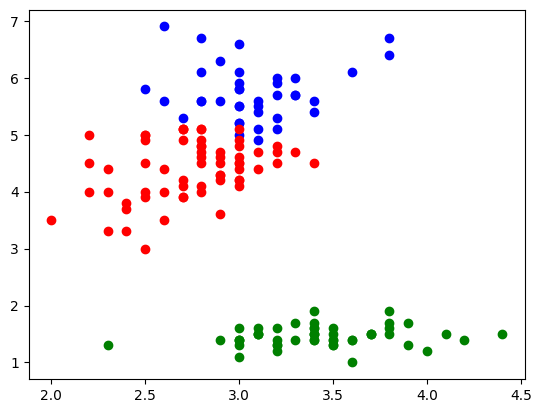

In [ ]:
# クラスタリングする数を設定
num_of_clusters = 3

# k-means法の適用
km = KMeans(n_clusters=num_of_clusters, random_state=None).fit(X)
#print(KM.labels_)

#結果の算出
result = km.predict(X)

#k-means法のクラスタリング結果を使って色分けして表示
color=["red","green","blue","black","gray"]

#k-means法でグループ化した結果の可視化
for n in range(len(X)):
    plt.scatter(X.iloc[n,1], X.iloc[n,2],c=color[result[n]])
plt.show()

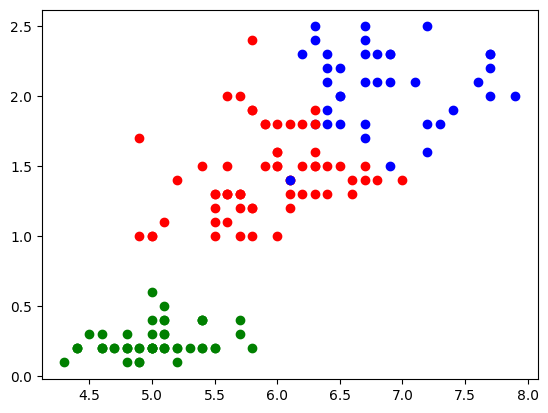

In [ ]:
# 別の2つの軸を選択

#k-means法でグループ化した結果の可視化
for n in range(len(X)):
    plt.scatter(X.iloc[n,0], X.iloc[n,3],c=color[result[n]])
plt.show()

In [ ]:
#正解ラベルとの比較：k-mean法のナンバリングはIRISのダミー変数化した場合のナンバリングと一致するとは限らないので、文字のまま数字と比較
for i in range(len(result)):
  print(result[i], y.iloc[i])

1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
1 Setosa
0 Versicolor
0 Versicolor
2 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
2 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Versicolor
0 Ve

[Text(0, 0, 'cluster 0'), Text(1, 0, 'cluster 1'), Text(2, 0, 'cluster 2')]

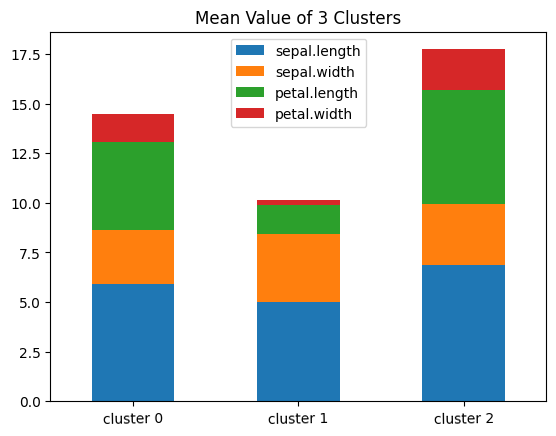

In [ ]:
#図示化の応用例：グループ化されたデータ集合の各説明変数の平均をとって図示化する
#各グループの花の特徴量の大きさを観察する

#アヤメデータにcluster_predを追加
ayame_df['cluster_pred'] = result

#clusterというデータフレーム作成
cluster = pd.DataFrame()

#clusterに各グループの説明変数の平均を入れる
for i in range(3):
    cluster['cluster ' + str(i)] = ayame_df[ayame_df['cluster_pred'] == i].mean()
cluster = cluster.drop('cluster_pred')

#図示する
mean_plot = cluster.T.plot(kind='bar', stacked=True, title="Mean Value of 3 Clusters")
mean_plot.set_xticklabels(mean_plot.xaxis.get_majorticklabels(), rotation=1)


In [ ]:
#精度の検証：基本的に教師なし学習では特徴をグループ化しているだけなので正解という概念はないが、
#説明変数でグループ化したものと目的変数を比較すれば精度は算出可能

from sklearn.metrics import accuracy_score

print(y.head())

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: species, dtype: object


In [ ]:
#目的変数の数値化
size_mapping = {'Virginica': 0, 'Versicolor': 2, 'Setosa': 1}

y2 =y.map(size_mapping)
print('精度： {:.3f}'.format(accuracy_score(y2, result)))

精度： 0.440


In [ ]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='warn', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centroids using sampling based on
 |      an empirical probability distribution of the points' contribution to the
 |      overall inertia. This technique speeds up convergence. The algorithm
 |      implemented is "greedy k-means++". It differs from the vanilla k-means++
 |      by making several t

### 別のテキストデータに k-mean 法を実行してみる

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# データの読み込み
data={}
for i in range(5):
    data[i] = pd.read_table("/content/drive/MyDrive/DataScience/3(0000"+ str(i) +").txt",sep=',')

In [ ]:
data[0].head()

,a,b,c
0,-4.430,2.999,-1.739
1,0.147,6.090,-0.136
2,-5.545,1.001,-2.339
3,2.290,-0.651,0.980
4,2.769,-1.375,5.321


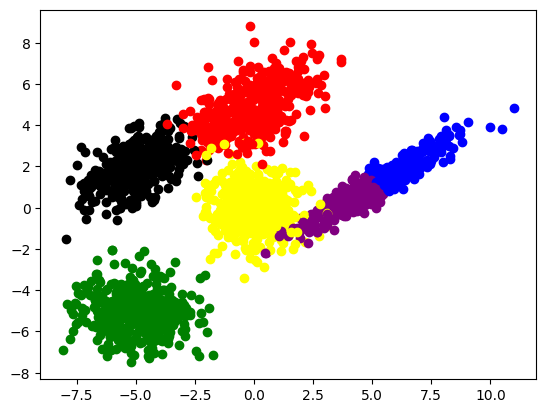

In [ ]:
#3(00000).txtデータに対してK-means法を適用

# クラスタリングする数
num_of_clusters = 6

#K-means法のモデル生成と学習
km2 = KMeans(n_clusters=num_of_clusters, random_state=0).fit(data[0])
km2_predict = km2.predict(data[0])

# 色の準備
color3=['red','green','yellow','black','blue','purple','lime','tomato','hotpink','sandybrown']

#生成した特徴量の可視化(0列と１列)
for n in range(len(data[0])):
    if km2_predict[n]==-1:
        km2_predict[n]=0
    plt.scatter(data[0].iat[n,0],data[0].iat[n,1],c=color3[km2_predict[n]])

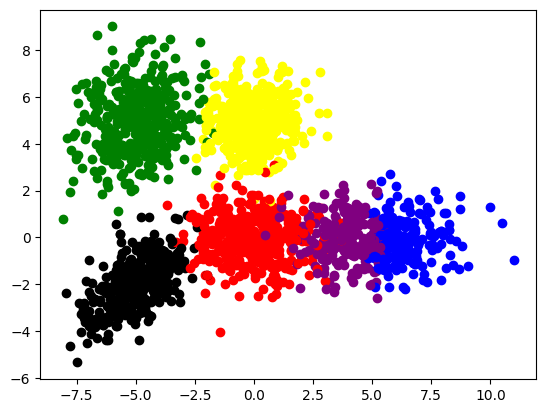

In [ ]:
#生成した特徴量の可視化(0列と２列)
for n in range(len(data[0])):
    if km2_predict[n]==-1:
        km2_predict[n]=0
    plt.scatter(data[0].iat[n,0],data[0].iat[n,2],c=color3[km2_predict[n]])

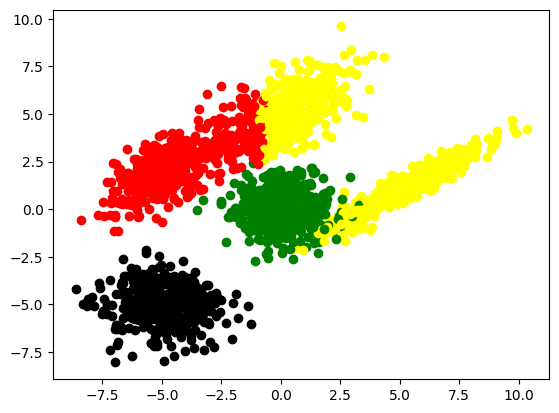

In [ ]:
#3(00002).txtデータに対してK-means法を適用

# クラスタリングする数
num_of_clusters = 4

#K-means法のモデル生成と学習
km3 = KMeans(n_clusters=num_of_clusters, random_state=0).fit(data[2])
km3_predict = km3.predict(data[2])

for n in range(len(data[2])):
    if km3_predict[n]==-1:
        km3_predict[n]=0
    plt.scatter(data[2].iat[n,0],data[2].iat[n,1],c=color3[km3_predict[n]])

### 演習１. クラスタリングする数を変更して，k-means法の動作を確かめる

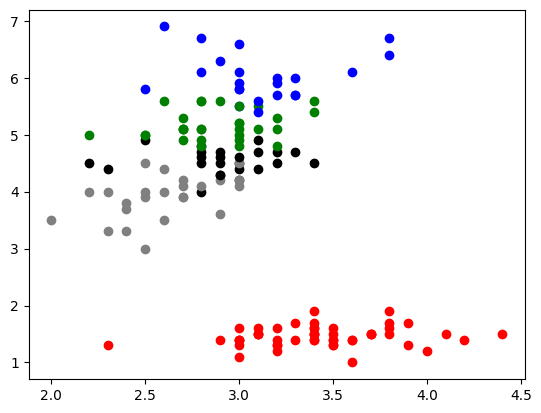

In [ ]:
# num_of_clusters の数を変更
# random_state = None としてみる
# クラスタリングする数を設定
num_of_clusters = 5

# k-means法の適用
km = KMeans(n_clusters=num_of_clusters, random_state=None).fit(X)
#print(KM.labels_)

#結果の算出
result = km.predict(X)

#k-means法のクラスタリング結果を使って色分けして表示
color=["red","green","blue","black","gray"]

#k-means法でグループ化した結果の可視化
for n in range(len(X)):
    plt.scatter(X.iloc[n,1], X.iloc[n,2],c=color[result[n]])
plt.show()


## 2.主成分分析（PCA）

### アヤメデータの主成分分析

In [ ]:
#アヤメデータに対して主成分分析(PCA)の実装
from sklearn.decomposition import PCA

# PCAの生成
pca = PCA(n_components = 2)

# PCAの学習
pca.fit(X)

# データを主成分空間に写像
X_pca= pca.transform(X)

print(X_pca)

[[-2.684  0.319]
 [-2.714 -0.177]
 [-2.889 -0.145]
 [-2.745 -0.318]
 [-2.729  0.327]
 [-2.281  0.741]
 [-2.821 -0.089]
 [-2.626  0.163]
 [-2.886 -0.578]
 [-2.673 -0.114]
 [-2.507  0.645]
 [-2.613  0.015]
 [-2.786 -0.235]
 [-3.224 -0.511]
 [-2.645  1.179]
 [-2.386  1.338]
 [-2.624  0.811]
 [-2.648  0.312]
 [-2.2    0.873]
 [-2.588  0.514]
 [-2.31   0.391]
 [-2.544  0.433]
 [-3.216  0.133]
 [-2.303  0.099]
 [-2.356 -0.037]
 [-2.507 -0.146]
 [-2.469  0.131]
 [-2.562  0.368]
 [-2.64   0.312]
 [-2.632 -0.197]
 [-2.587 -0.204]
 [-2.41   0.411]
 [-2.649  0.813]
 [-2.599  1.093]
 [-2.637 -0.121]
 [-2.866  0.069]
 [-2.625  0.599]
 [-2.801  0.269]
 [-2.981 -0.488]
 [-2.59   0.229]
 [-2.77   0.264]
 [-2.849 -0.941]
 [-2.997 -0.342]
 [-2.406  0.189]
 [-2.209  0.437]
 [-2.714 -0.25 ]
 [-2.538  0.504]
 [-2.839 -0.228]
 [-2.543  0.579]
 [-2.703  0.108]
 [ 1.285  0.685]
 [ 0.932  0.318]
 [ 1.464  0.504]
 [ 0.183 -0.828]
 [ 1.088  0.075]
 [ 0.642 -0.418]
 [ 1.095  0.283]
 [-0.749 -1.005]
 [ 1.044  0.22

In [ ]:
#順序尺度の数値化
size_mapping = {'Virginica': 2, 'Versicolor': 1, 'Setosa': 0}
ayame_mapped = ayame_df['species'].map(size_mapping)

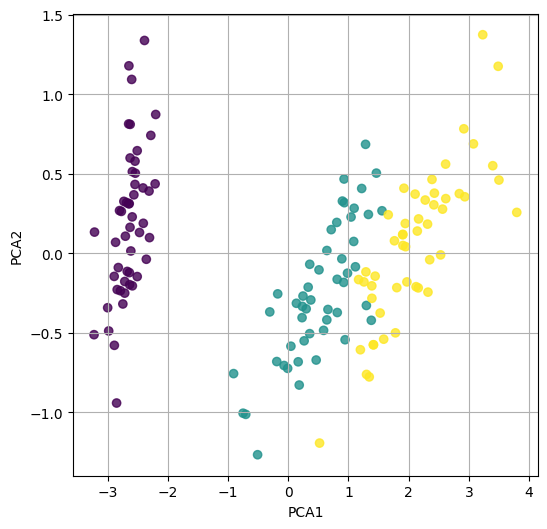

In [ ]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0],  X_pca[:, 1], alpha=0.8, c=list(ayame_mapped))
plt.grid()
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [ ]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 

### ワインデータの主成分分析
+ ワインの３品種の様々な観測値データを利用
+ 主成分分析を実行

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

#ライブラリpandasを使ったcsvデータの読み込み,sepで区切り記号を設定
wine_df = pd.read_csv("/content/drive/MyDrive/DataScience/wine.csv", sep=",", header=None)
#最初の五行だけ表示
wine_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# 最左列が品種クラスを表している．２列目以降は各種の観測値
wine_df.columns = ['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
                   'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols', 'Proanthocyanins',
                   'Color_intensity', 'Hue', '0D280_0D315_of_diluted_wines', 'Proline']

wine_df

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.040,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.050,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.030,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.860,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.040,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.050,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.020,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.060,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.080,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.010,3.55,1045


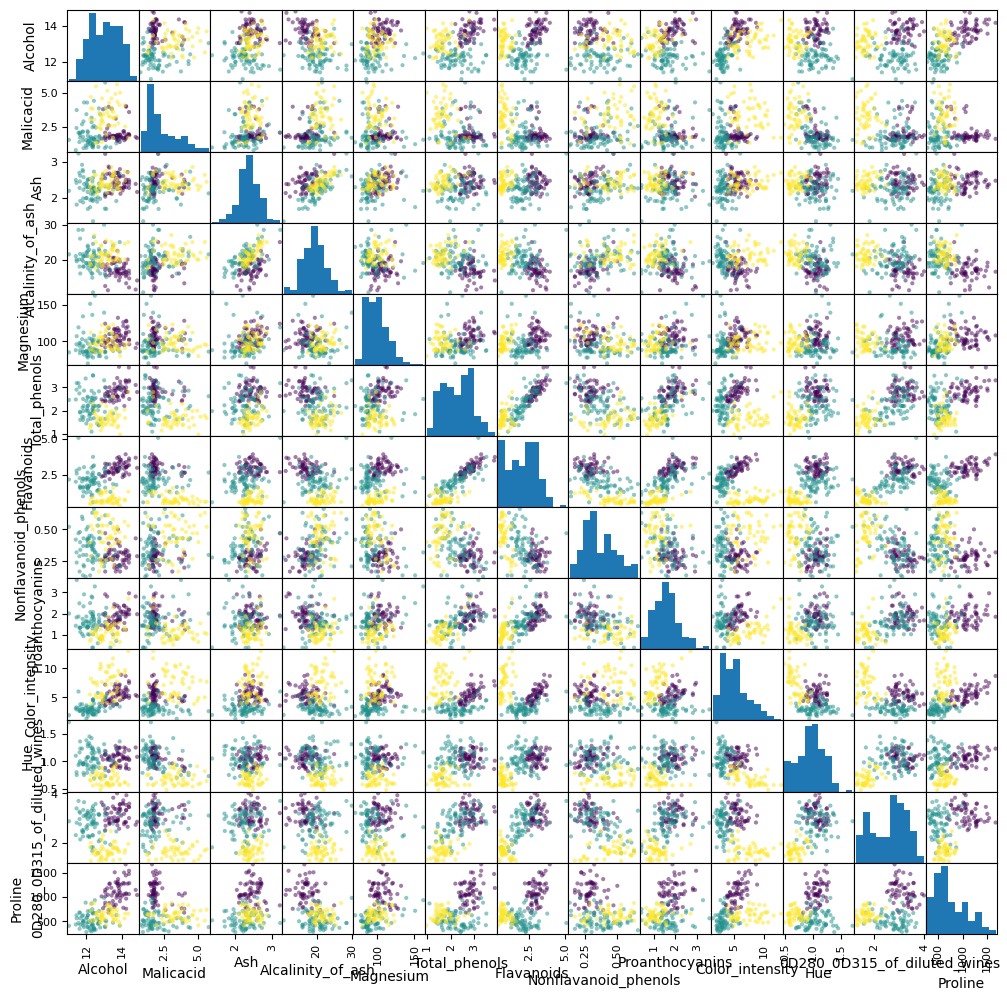

In [ ]:
from pandas import plotting

# class 以外の観測値の散布図
plotting.scatter_matrix(wine_df.iloc[:, 1:], figsize=(12, 12), c=list(wine_df.iloc[:, 0]), alpha=0.5)
plt.show()

In [ ]:
# 行列の標準化
wine_std_df = wine_df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
wine_std_df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1.514,-0.561,0.231,-1.166,1.909,0.807,1.032,-0.658,1.221,0.251,0.361,1.843,1.010
1,0.246,-0.498,-0.826,-2.484,0.018,0.567,0.732,-0.818,-0.543,-0.292,0.405,1.110,0.963
2,0.196,0.021,1.106,-0.268,0.088,0.807,1.212,-0.497,2.130,0.268,0.317,0.786,1.391
3,1.687,-0.346,0.487,-0.807,0.928,2.484,1.462,-0.979,1.029,1.183,-0.426,1.181,2.328
4,0.295,0.227,1.835,0.451,1.278,0.807,0.661,0.226,0.400,-0.318,0.361,0.448,-0.038


In [ ]:
#主成分分析の実行
pca = PCA(n_components = 2)
pca.fit(wine_std_df)

# データを主成分空間に写像
Wine_pca = pca.transform(wine_std_df)

print(Wine_pca)

[[ 3.307 -1.439]
 [ 2.203  0.332]
 [ 2.51  -1.028]
 [ 3.746 -2.749]
 [ 1.006 -0.867]
 [ 3.042 -2.116]
 [ 2.442 -1.172]
 [ 2.054 -1.604]
 [ 2.504 -0.915]
 [ 2.746 -0.787]
 [ 3.47  -1.299]
 [ 1.75  -0.61 ]
 [ 2.108 -0.674]
 [ 3.448 -1.127]
 [ 4.301 -2.09 ]
 [ 2.299 -1.658]
 [ 2.166 -2.321]
 [ 1.894 -1.627]
 [ 3.532 -2.511]
 [ 2.079 -1.058]
 [ 3.116 -0.785]
 [ 1.084 -0.241]
 [ 2.528  0.092]
 [ 1.64   0.515]
 [ 1.757  0.316]
 [ 0.987 -0.938]
 [ 1.77  -0.684]
 [ 1.232  0.09 ]
 [ 2.182 -0.688]
 [ 2.25  -0.191]
 [ 2.493 -1.237]
 [ 2.67  -1.468]
 [ 1.624 -0.053]
 [ 1.897 -1.628]
 [ 1.406 -0.696]
 [ 1.898 -0.176]
 [ 1.381 -0.657]
 [ 1.119 -0.114]
 [ 1.498  0.767]
 [ 2.523 -1.798]
 [ 2.581 -0.777]
 [ 0.667 -0.169]
 [ 3.062 -1.153]
 [ 0.461 -0.33 ]
 [ 2.095  0.071]
 [ 1.133 -1.772]
 [ 2.719 -1.188]
 [ 2.813 -0.644]
 [ 2.004 -1.244]
 [ 2.7   -1.747]
 [ 3.206 -0.167]
 [ 2.851 -0.743]
 [ 3.496 -1.608]
 [ 2.219 -1.87 ]
 [ 2.141 -1.014]
 [ 2.462 -1.325]
 [ 2.734 -1.433]
 [ 2.168 -1.209]
 [ 3.131 -1.72

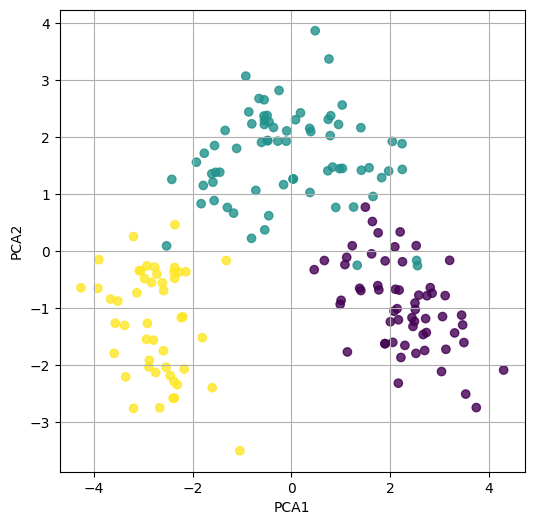

In [ ]:
# 第1主成分と第2主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(Wine_pca[:, 0], Wine_pca[:, 1], alpha=0.8, c=list(wine_df.iloc[:, 0]))
plt.grid()
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

In [ ]:
#主成分分析の実行
pca = PCA()
pca.fit(wine_std_df)

# データを主成分空間に写像
Wine_pca = pca.transform(wine_std_df)

In [ ]:
# 主成分得点
pd.DataFrame(Wine_pca, columns=['PCA{}'.format(x + 1) for x in range(len(wine_std_df.columns))]).head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,3.307,-1.439,-0.165,-0.215,0.691,-0.223,0.595,0.065,0.640,1.018,-0.450,5.393e-01,-0.066
1,2.203,0.332,-2.021,-0.291,-0.257,-0.925,0.054,1.022,-0.308,0.159,-0.142,3.871e-01,0.004
2,2.510,-1.028,0.980,0.723,-0.250,0.548,0.423,-0.343,-1.175,0.113,-0.286,5.819e-04,0.022
3,3.746,-2.749,-0.176,0.566,-0.311,0.114,-0.382,0.642,0.052,0.239,0.757,-2.413e-01,-0.368
4,1.006,-0.867,2.021,-0.409,0.298,-0.405,0.443,0.416,0.326,-0.078,-0.524,-2.161e-01,-0.079


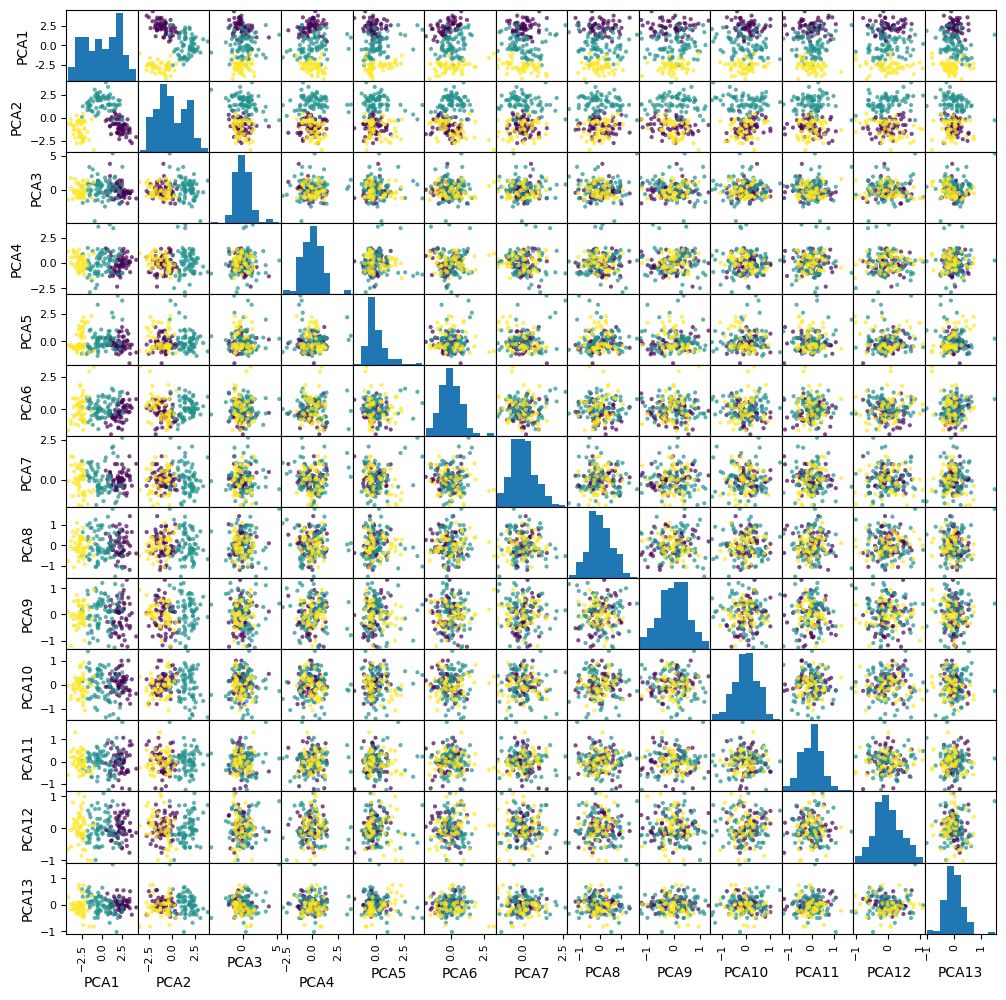

In [ ]:
from pandas import plotting

plotting.scatter_matrix(pd.DataFrame(Wine_pca,
                        columns=["PCA{}".format(x + 1) for x in range(len(wine_std_df.columns))]),
                        figsize=(12, 12), c=list(wine_df.iloc[:, 0]), alpha=0.7)
plt.show()

In [ ]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PCA{}".format(x + 1) for x in range(len(wine_std_df.columns))])

,0
PCA1,0.362
PCA2,0.192
PCA3,0.111
PCA4,0.071
PCA5,0.066
PCA6,0.049
PCA7,0.042
PCA8,0.027
PCA9,0.022
PCA10,0.019


In [ ]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PCA{}".format(x + 1) for x in range(len(wine_std_df.columns))])

,0
PCA1,4.706
PCA2,2.497
PCA3,1.446
PCA4,0.919
PCA5,0.853
PCA6,0.642
PCA7,0.551
PCA8,0.348
PCA9,0.289
PCA10,0.251
